# Life expectancy based on GDP

The goal of this project is to analyze the life expectancy in different countries based on the country's GDP.

Some important points that we try to analyze:

- the evolution of GDP for each country in every year
- comparison between the GDP of each coutry
- comparison between the life expectancy of each country


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load the data

The `all_data.csv` contains information about some countries regarding their GPD and life expecatancy. The columns included are:

- **Country** - The name of the country
- **Year** - The year of the obervations
- **Life expectancy at birth(years)** - The life expectancy measured in years
- **GDP** - The gross domestic product for each country/year

In [2]:
df = pd.read_csv('all_data.csv')
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


## Data exploration

In [3]:
df.describe(include='all')

,Country,Year,Life expectancy at birth (years),GDP
count,96,96.000000,96.000000,9.600000e+01
unique,6,NaN,NaN,NaN
top,Chile,NaN,NaN,NaN
freq,16,NaN,NaN,NaN
mean,NaN,2007.500000,72.789583,3.880499e+12
std,NaN,4.633971,10.672882,5.197561e+12
min,NaN,2000.000000,44.300000,4.415703e+09
25%,NaN,2003.750000,74.475000,1.733018e+11
50%,NaN,2007.500000,76.750000,1.280220e+12
75%,NaN,2011.250000,78.900000,4.067510e+12


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [5]:
df = df.rename({"Life expectancy at birth (years)":"LEABY"}, axis = "columns")
df.head()

,Country,Year,LEABY,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [6]:
df['Country'].unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

In [7]:
df['Year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015], dtype=int64)

## Data analysis

Text(0.5, 1.0, 'Evolution of life expectancy over the years per country')

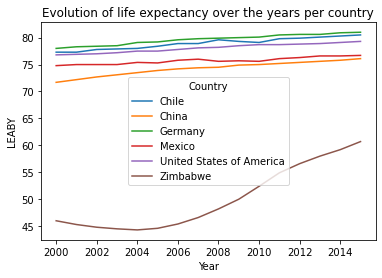

In [8]:
sns.lineplot(x=df['Year'], y=df['LEABY'], hue=df['Country'])
plt.title('Evolution of life expectancy over the years per country')

Text(0.5, 1.0, 'Evolution of GDP over the years per contry')

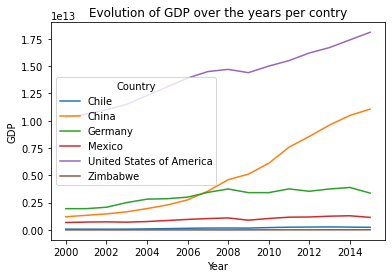

In [9]:
sns.lineplot(x=df['Year'], y=df['GDP'], hue=df['Country'])
plt.title('Evolution of GDP over the years per contry')

In [10]:
dfMeans = df.drop('Year', axis = 1).groupby('Country').mean().reset_index()
dfMeans

,Country,LEABY,GDP
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


Text(0.5, 1.0, 'Average life expectancy per country')

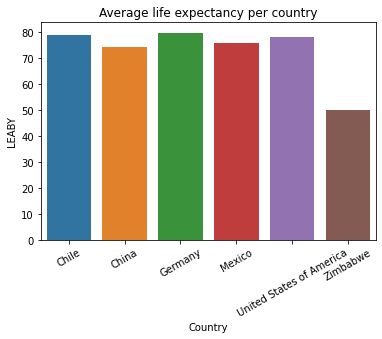

In [11]:
sns.barplot(x=dfMeans['Country'], y=dfMeans['LEABY'])
plt.xticks(rotation=30)
plt.title('Average life expectancy per country')

Text(0.5, 1.0, 'Average GDP per country')

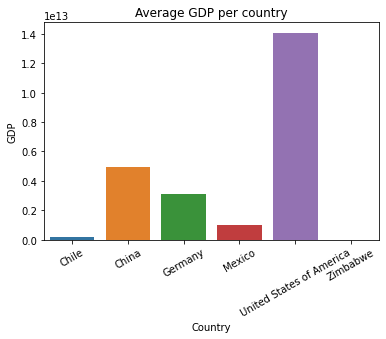

In [12]:
sns.barplot(x=dfMeans['Country'], y=dfMeans['GDP'])
plt.xticks(rotation=30)
plt.title('Average GDP per country')

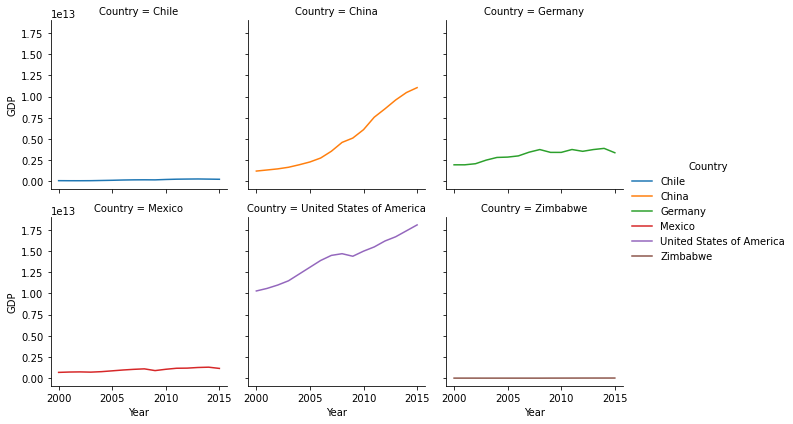

In [13]:
grid = sns.FacetGrid(df, col='Country', hue='Country', col_wrap = 3)
grid.map(sns.lineplot, 'Year', 'GDP')
grid.add_legend()

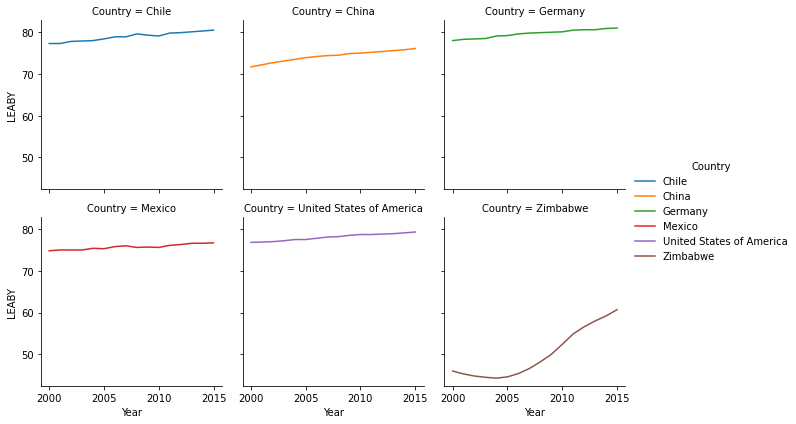

In [14]:
grid = sns.FacetGrid(df, col='Country', hue='Country', col_wrap = 3)
grid.map(sns.lineplot, 'Year', 'LEABY')
grid.add_legend()

From the analysis we can conclude that an increase in GDP also means an increase in life expectancy up to a point.